In [5]:
#import necessary libaries
import pandas as pd
import matplotlib

In [6]:
#name file path (you will have download your own dataset and populate the path and choose the appropriate cell to execute)
file = '1. Clean & Deidentified - Counterfeit Diversity - Study 1 (MTurk).csv' # <-- edit this value! 

In [7]:
#read data from CSV (.csv) & print head
df = pd.read_csv(file)
print(df.head())

   DataFilter         ResponseID     StartDate       EndDate  \
0           0  R_3G3eTcIf1i4W4Cs  5/1/18 10:29  5/1/18 10:48   
1           0  R_2UWrynxHQXYxdAg  5/1/18 14:29  5/1/18 14:55   
2           0  R_V4o8uh4CCrscRBn  5/1/18 20:34  5/1/18 20:47   
3           0  R_2ZKp7WkfuYKZkaQ  5/1/18 19:22  5/1/18 19:39   
4           0  R_3HNdrLDBInSx1pc  5/1/18 10:15  5/1/18 12:19   

   DiversityCondition  Gender_Bin  xDiversityExpecation  xSincerity  \
0                 0.0         NaN                   5.5         3.0   
1                 1.0         NaN                   7.0         4.5   
2                 0.0         NaN                   5.0         2.0   
3                 0.0         1.0                   3.0         1.0   
4                -1.0         0.0                   4.5         NaN   

   xThreatBasedConcerns  xThreatBasedConcerns_Preregistered  Interest_T1  \
0                  1.67                                0.14          4.0   
1                  2.00             

In [8]:
print(list(df))
print(len(df))

['DataFilter', 'ResponseID', 'StartDate', 'EndDate', 'DiversityCondition', 'Gender_Bin', 'xDiversityExpecation', 'xSincerity', 'xThreatBasedConcerns', 'xThreatBasedConcerns_Preregistered', 'Interest_T1', 'Interest_T2']
653


In [9]:
#output frequency table of chosen column in dataset
col = 'Interest_T1' #<-edit this value! column name as it appears in dataframe
col_name = 'How interested would you be in the project manager position at Harrison Technologies?' #<-edit this value! descriptive name for column
freq = df[col].value_counts().rename_axis(col_name).reset_index(name='freq')
freq = freq.sort_values(by = col_name)
print(freq)

   How interested would you be in the project manager position at Harrison Technologies?  \
4                                                1.0                                       
3                                                2.0                                       
1                                                3.0                                       
0                                                4.0                                       
2                                                5.0                                       

   freq  
4    23  
3    44  
1    99  
0   248  
2    92  


In [11]:
#replace codes with descriptive labels
#if your dataframe already has descriptive labels, you don't need to run this cell
codebook = [['1', 'Not at all interested'], #<- if appropriate, replace these values based on codebook or data dictionary for your dataset
            ['2', 'A bit interested'], 
            ['3', 'Moderately interested'], 
            ['4', 'Quite interested'], 
            ['5', 'Extremely interested']]
#loops through label codes and replaces them in frequency table
for lbl in codebook:
    #use line below if codes are stored as integers
    freq[col_name] = freq[col_name].replace(int(lbl[0]), lbl[1])
    #use line below if codes are stored as strings
    #freq[col_name] = freq[col_name].replace(lbl[0], lbl[1])
#prints updated frequency table
print(freq)

  How interested would you be in the project manager position at Harrison Technologies?  \
4                              Not at all interested                                      
3                                   A bit interested                                      
1                              Moderately interested                                      
0                                   Quite interested                                      
2                               Extremely interested                                      

   freq  
4    23  
3    44  
1    99  
0   248  
2    92  


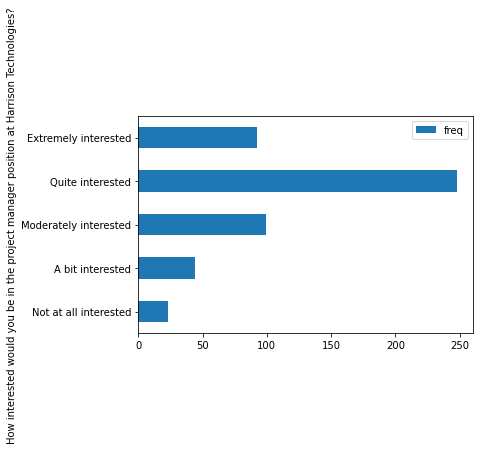

In [12]:
#create frequency chart
ax = freq.plot.barh(x=col_name, y='freq', rot=0)